In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_cluster_data(
        project_name=tv_projects[1],
        file_path="sessions/{}/{}.csv".format(mouse, mouse),
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 301,022,513  speedup is 3,010,225.13
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 240,284,208  speedup is 2,402,842.08
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 284,369,538  speedup is 2,843,695.38
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 219,240,689  speedup is 2,192,406.89
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 203,488,253  speedup is 2,034,882.53
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 219,302,870  speedup is 2,193,028.70
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 215,492,942  speedup is 2,154,929.42
receiving incremental file list

sent 27 bytes  received 73 by

/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_821311/4251537678.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [3]:
time_of_restraint_removal = '2025-06-10 14:00:00'
time_before_removal = pd.to_datetime(time_of_restraint_removal) - pd.Timedelta(days=45)

# transform the date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

df_before = df[np.logical_and(df['date'] > time_before_removal, 
                        df['date'] < pd.to_datetime(time_of_restraint_removal))]
df_after = df[df['date'] >= pd.to_datetime(time_of_restraint_removal)]

In [4]:
occupancy_df_before = dft.get_start_and_end_of_sessions_df(df_before)
daily_percentages_before = dft.get_daily_occupancy_percentages(occupancy_df_before)

occupancy_df_after = dft.get_start_and_end_of_sessions_df(df_after)
daily_percentages_after = dft.get_daily_occupancy_percentages(occupancy_df_after)

In [5]:
# merge the two dataframes
occupancy_df_before['time_limit'] = '25/30mins_4hours'
occupancy_df_after['time_limit'] = '1min_1min'
# turn daily percentages into a dataframe with the index as a column
daily_percentages_before = daily_percentages_before.reset_index()
daily_percentages_after = daily_percentages_after.reset_index()
daily_percentages_before['time_limit'] = '25/30mins_4hours'
daily_percentages_after['time_limit'] = '1min_1min'
occupancy_df = pd.concat([occupancy_df_before, occupancy_df_after], ignore_index=True)
daily_percentages = pd.concat([daily_percentages_before, daily_percentages_after], ignore_index=False)

In [6]:
# remove the 2025-06-10, 21 and 23 date, and today
# TODO: this can be cleaned way better, but I will reduce the number of data
today = pd.to_datetime('today').date()

dates_to_remove = [pd.to_datetime('2025-06-10').date(),
    pd.to_datetime('2025-06-21').date(),
    pd.to_datetime('2025-06-23').date(),
    today]

occupancy_df = occupancy_df[occupancy_df['date'].isin(dates_to_remove) == False]
daily_percentages = daily_percentages[daily_percentages['date'].isin(dates_to_remove) == False]

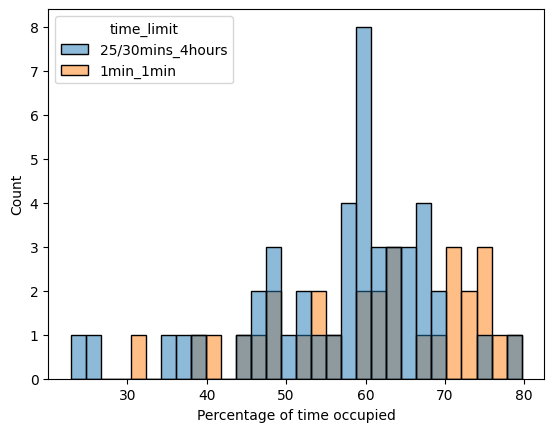

In [7]:
sns.histplot(data=daily_percentages, x='duration', hue='time_limit', stat='count', bins=30)
plt.xlabel("Percentage of time occupied")
plt.show()

In [8]:
# night and day occupancy
occupancy_heatmap_before = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == '25/30mins_4hours'], window_size=30)
occupancy_heatmap_after = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == '1min_1min'], window_size=30)

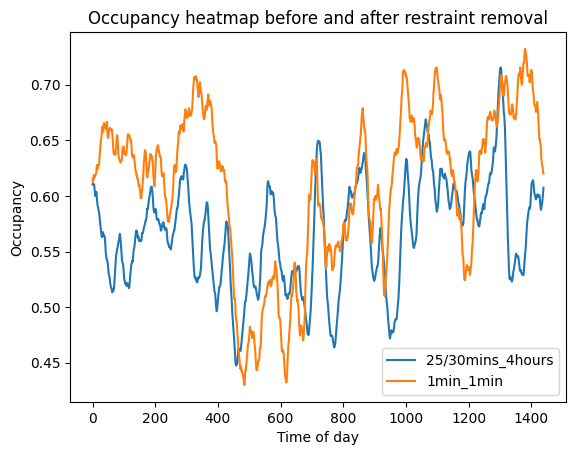

In [9]:
min_of_day = list(np.arange(0, len(occupancy_heatmap_before)))
plt.plot(min_of_day, occupancy_heatmap_before, label='25/30mins_4hours')
plt.plot(min_of_day, occupancy_heatmap_after, label='1min_1min')
plt.xlabel("Time of day")
plt.ylabel("Occupancy")
plt.title("Occupancy heatmap before and after restraint removal")
plt.legend()
plt.show()

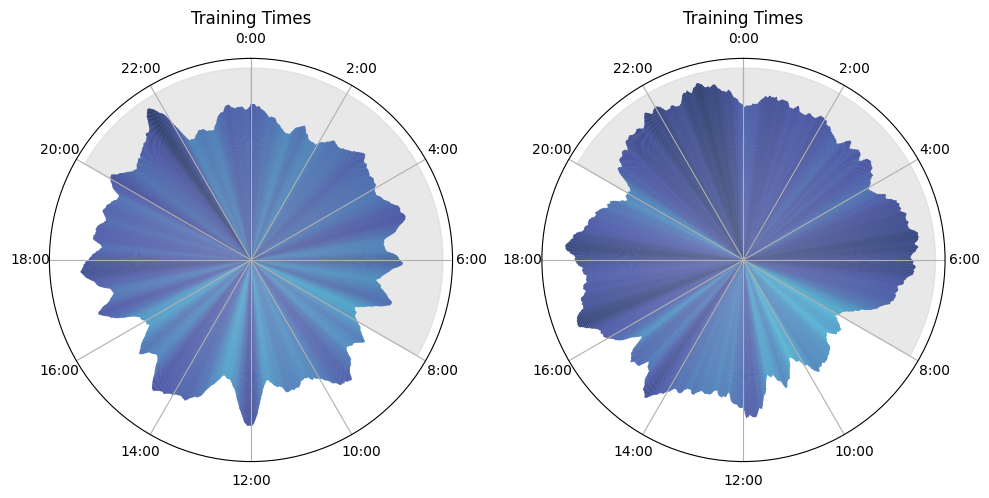

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={"projection": "polar"})
plots.plot_training_times_clock_heatmap(occupancy_heatmap_before, ax=axs[0])
plots.plot_training_times_clock_heatmap(occupancy_heatmap_after, ax=axs[1])
plt.tight_layout()
plt.show()

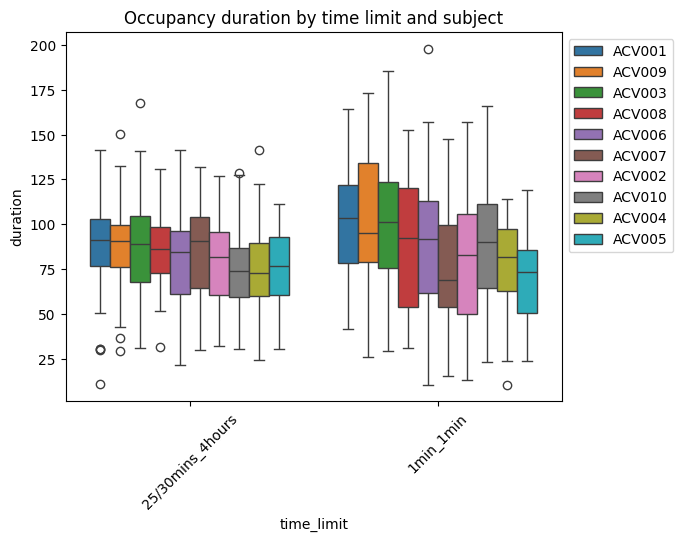

In [11]:
occ_df_gb = occupancy_df.groupby(['subject', 'date', 'time_limit'])['duration'].sum().reset_index()
sort_order = occ_df_gb.groupby('subject')['duration'].mean().sort_values(ascending=False).index
sns.boxplot(data=occ_df_gb, x='time_limit', y='duration', hue='subject', hue_order=sort_order)
plt.xticks(rotation=45)
plt.title('Occupancy duration by time limit and subject')
# move legend to the right outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_occupancy_duration_by_subject.pdf', bbox_inches='tight', transparent=True)

<Axes: xlabel='time_limit', ylabel='duration'>

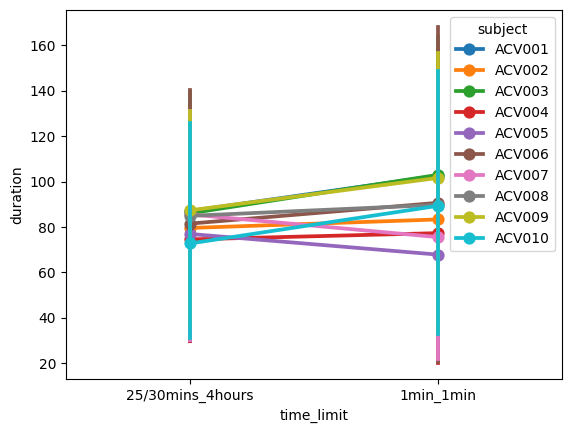

In [12]:
# compare each mouse before and after
sns.pointplot(data=occ_df_gb, x='time_limit', y='duration', hue='subject', native_scale=True, linestyles="-", errorbar=("pi", 95))

In [13]:
# check how the occupancy between mice correlates. This can be complex and is hard
# to interpret, as sometimes the box is stopped, so the correlation might be positive

In [14]:
## plot a distribution with the histogram of number of trials in total and by mouse

# get session summary data
local_path = Path(utils.get_outpath()) / Path(tv_projects[1])
# download the session data
utils.rsync_cluster_data(
    project_name=tv_projects[1],
    file_path="sessions_summary.csv",
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
sessions_summary_df = pd.read_csv(local_path / Path('sessions_summary.csv'), sep=';')

receiving incremental file list

sent 27 bytes  received 82 bytes  43.60 bytes/sec
total size is 6,605,462  speedup is 60,600.57


In [15]:
# filter the sessions summary for before and after
sessions_summary_df['date'] = pd.to_datetime(sessions_summary_df['date'], format='%Y-%m-%d %H:%M:%S')
sessions_summary_df = sessions_summary_df[sessions_summary_df['date'] > pd.to_datetime(time_before_removal)]
sessions_summary_df["time_limit"] = np.where(
    sessions_summary_df['date'] < pd.to_datetime(time_of_restraint_removal),
    '25/30mins_4hours',
    '1min_1min'
)


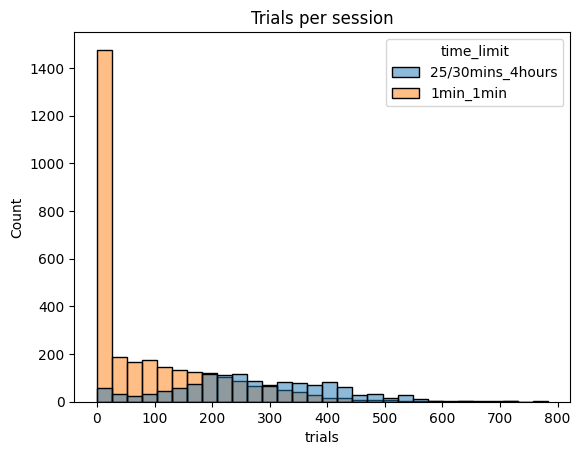

In [16]:
sns.histplot(data=sessions_summary_df, x='trials', hue='time_limit', stat='count', bins=30)
plt.title("Trials per session")
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_per_session.pdf', bbox_inches='tight', transparent=True)

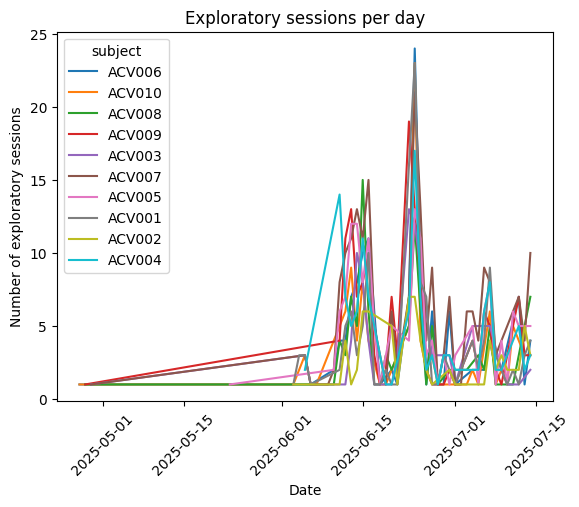

In [18]:
# get a number of exploratory entries (sessions with less than 10 trials)
# calculate the number of trials per day, and the number of sessions per day
sessions_summary_df['date_day'] = sessions_summary_df['date'].dt.date
exploratory_sessions = sessions_summary_df[sessions_summary_df['trials'] < 10]
# group them by date and subject and count them
exploratory_sessions = exploratory_sessions.groupby(['date_day', 'subject']).size().reset_index(name='count')
# plot them over time
sns.lineplot(data=exploratory_sessions, x='date_day', y='count', hue='subject')
plt.title("Exploratory sessions per day")
plt.xlabel("Date")
plt.ylabel("Number of exploratory sessions")
plt.xticks(rotation=45)

plt.show()

In [19]:
# remove them from the dataset
sessions_summary_df = sessions_summary_df[sessions_summary_df['trials'] >= 10]

In [20]:
trials_per_day = sessions_summary_df.groupby(['date_day', 'time_limit', 'subject']).agg({'trials': 'sum', 'task': 'count'}).reset_index()
# rename the columns
trials_per_day.rename(columns={'task': 'sessions'}, inplace=True)

In [ ]:
# cap the number of sessions to 10 for plotting
# trials_per_day['sessions'] = trials_per_day['sessions'].clip(upper=10)

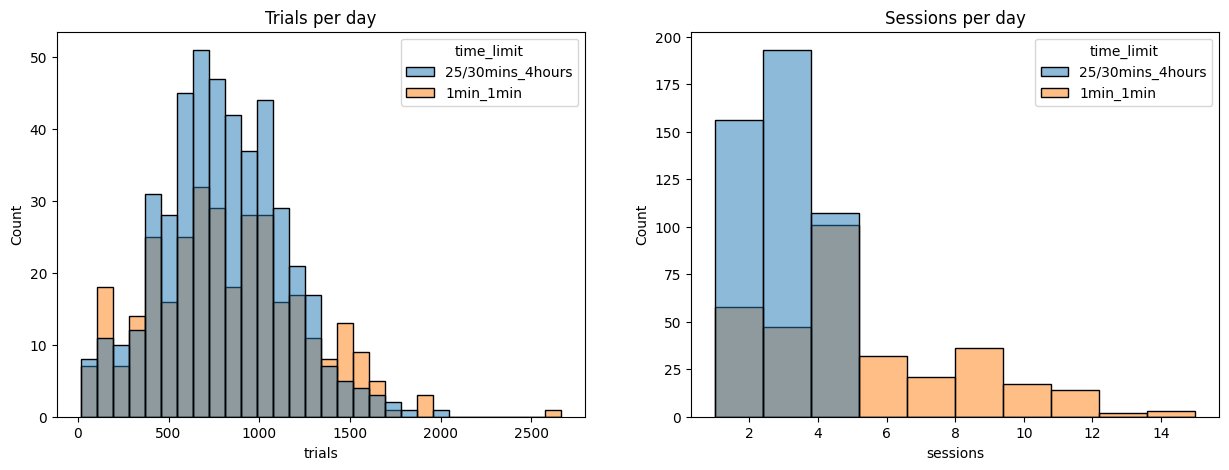

In [21]:
# plot two histograms, one for trials and one for sessions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=trials_per_day, x='trials', hue='time_limit', stat='count', bins=30, ax=ax[0])
sns.histplot(data=trials_per_day, x='sessions', hue='time_limit', stat='count', bins=10, ax=ax[1])
ax[0].set_title("Trials per day")
ax[1].set_title("Sessions per day")
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_and_sessions_per_day.pdf', bbox_inches='tight', transparent=True)

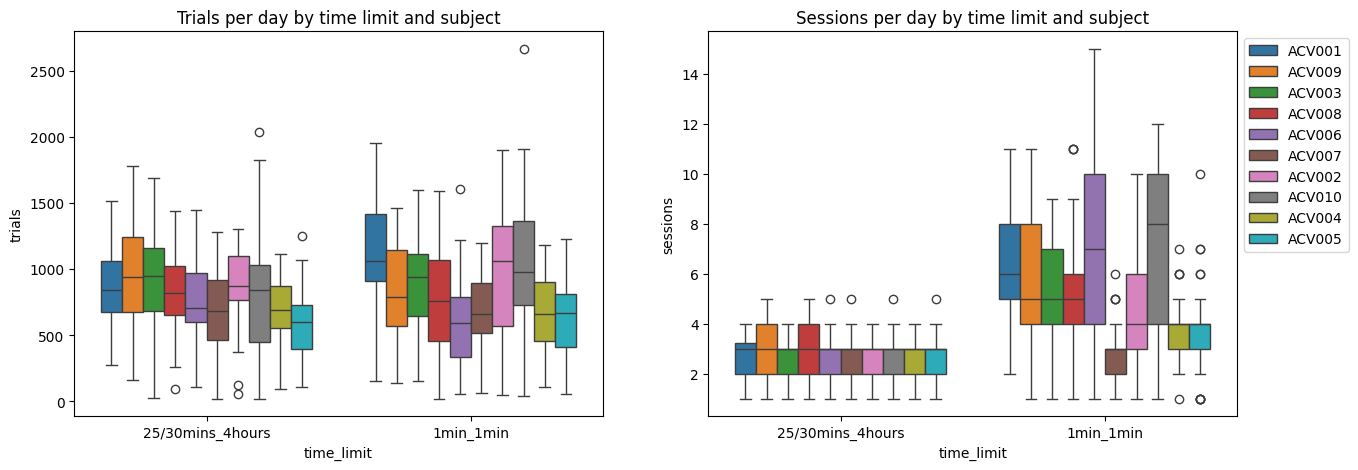

: 

In [ ]:
# make boxplots for each mouse as above
hue_order = sorted(trials_per_day['subject'].unique())
trials_per_day['subject'] = pd.Categorical(trials_per_day['subject'], categories=hue_order, ordered=True)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=trials_per_day, x='time_limit', y='trials', hue='subject', ax=ax[0], hue_order=sort_order)
sns.boxplot(data=trials_per_day, x='time_limit', y='sessions', hue='subject', ax=ax[1], hue_order=sort_order)
ax[0].set_title('Trials per day by time limit and subject')
ax[1].set_title('Sessions per day by time limit and subject')
ax[0].get_legend().remove()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.show()
# save figure as .pdf
plt.savefig('figures/hmv_no_restraints_trials_and_sessions_per_day_by_subject.pdf', bbox_inches='tight', transparent=True)

In [ ]:
# plot performance by mouse over trials with vertical lines for the time of restraint removal
training_stage_to_look_at = "TwoAFC_auditory_easy"
df_tla = df[df['current_training_stage'] == training_stage_to_look_at]
df_tla = dft.analyze_df(df_tla)

/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna("not saved")
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["correct"] = df["correct"].infer_objects(copy=False)


In [ ]:
df_tla["time_limit"] = np.where(
    df_tla['date'] < pd.to_datetime(time_of_restraint_removal),
    '25/30mins_4hours',
    '1min_1min'
)

In [ ]:
df_to_plot_correct = df_tla.groupby(['subject', 'year_month_day', 'time_limit'])[['correct']].mean().reset_index()

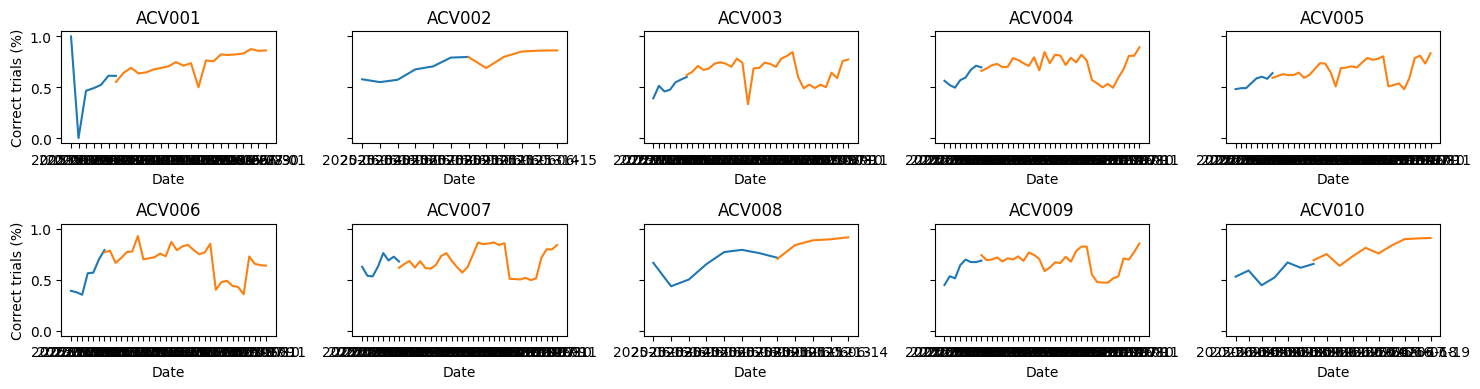

In [ ]:
ncols = df_to_plot_correct.subject.nunique() / 2
nrows = 2
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df_to_plot_correct.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='year_month_day', y='correct', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
# redo it by computing the performance in each trial.
df_subject_list = []
for mouse in animals:
    df_mouse = df_tla[df_tla['subject'] == mouse]
    # calculate the performances
    df_mouse = dft.get_performance_through_trials(df_mouse, window=100)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

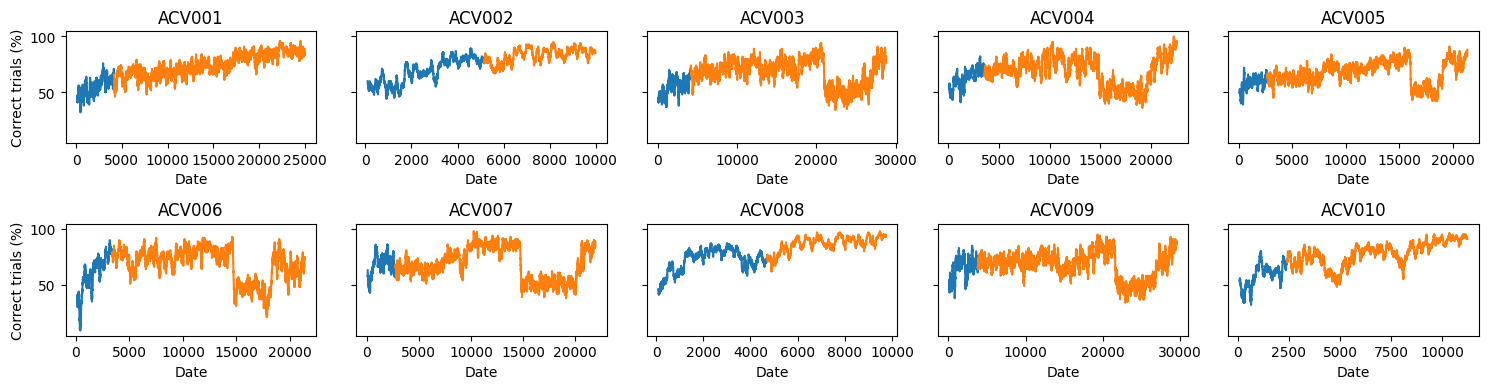

In [ ]:
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df2afc.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='total_trial', y='performance_w', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
## Differences between night and day sessions